# Redes Mundos Pequenos
Fernando Vilela Brandão 2021421907

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(8, 8)) 

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

# A

In [2]:
def genSmallWorld(N, Z, p):
  #Arestas concectando o nó aos seus Z vizinhos mais próximos
  shortcuts = int(p * ((N * Z) / 2))
  Z = Z//2
  G = nx.Graph()

  for i in range(0, N):
    G.add_node(i)

  for i in range(0, N):
    for k in range(1,Z+1):
      previous_index = (i - k) % N
      next_index = (i + k) % N
      G.add_edge(i, previous_index)
      G.add_edge(i, next_index)


  for i in range(0, shortcuts):
    randomNode1 = np.random.randint(0,N)
    randomNode2 = np.random.randint(0,N)
    G.add_edge(randomNode1, randomNode2)

  return G

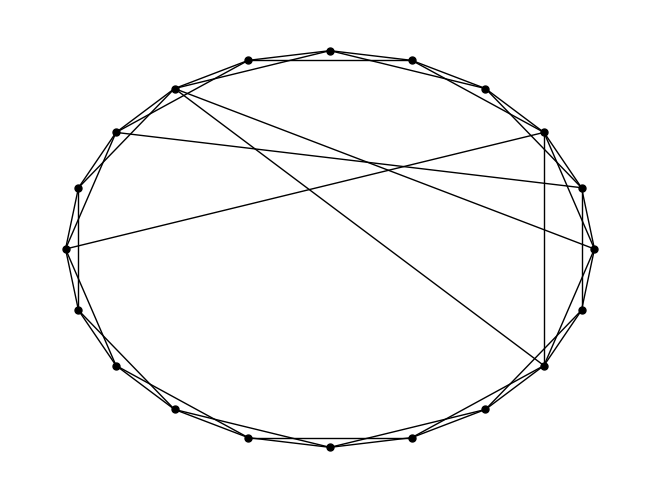

In [3]:
G0 = genSmallWorld(20,4,0.2)
nx.draw_circular(G0, node_color='black', node_size=25)

# B

## B.1

In [4]:
def FindPathLengthsFromNode(graph, node):
  path_lengths = nx.shortest_path_length(graph, node)
  
  return path_lengths

## B.2

In [5]:
def FindAllPathLengths(graph):
  list_of_all_path_lengths = []
  
  for i in list(graph.nodes):
    list_of_all_path_lengths.append(FindPathLengthsFromNode(graph, i))

  return list_of_all_path_lengths

In [6]:
def plot_hist(listOfAllPathLenghts):
  lengths = []
  
  # Extract the lengths
  for i in listOfAllPathLenghts:
    lengths += list(i.values())
  
  bins = np.arange(min(lengths), max(lengths) + 2) - 0.5

  # Plotting the histogram
  plt.hist(lengths, bins=bins, edgecolor='black')

  # Customize x-axis ticks to display as integers
  plt.xticks(np.arange(min(lengths), max(lengths) + 1, 10))
    
  # Adding labels and title
  plt.xlabel('Tamanho de comprimentos de caminhos')
  plt.ylabel('Frequência absoluta')
  plt.title('Histograma de comprimentos de caminhos')

  # Displaying the histogram
  plt.show()
  

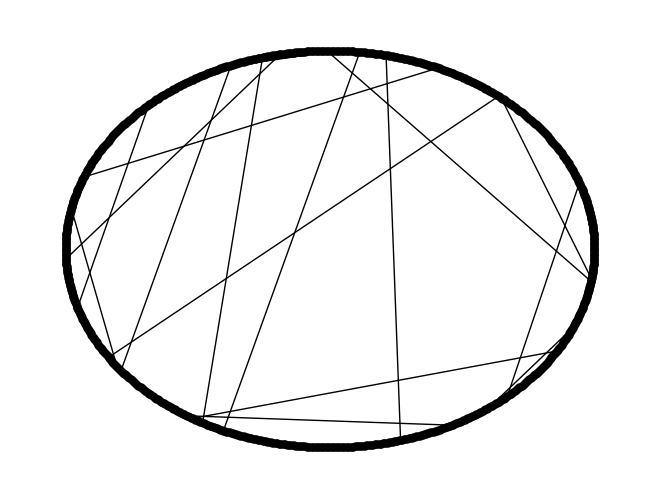

In [7]:
G1 = genSmallWorld(1000,2,0.02)
nx.draw_circular(G1, node_color='black', node_size=25)

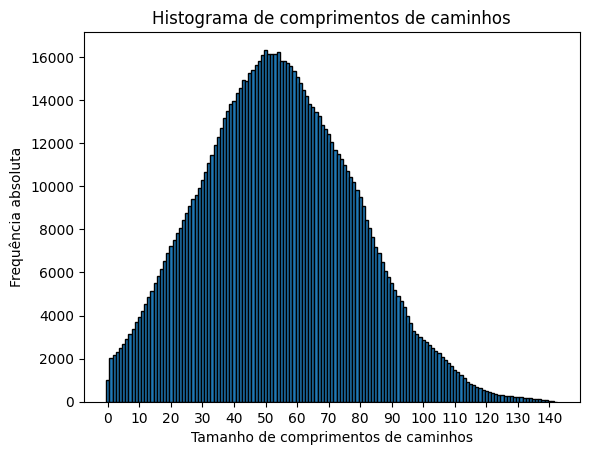

In [8]:
G1Lenghts = FindAllPathLengths(G1)
plot_hist(G1Lenghts)

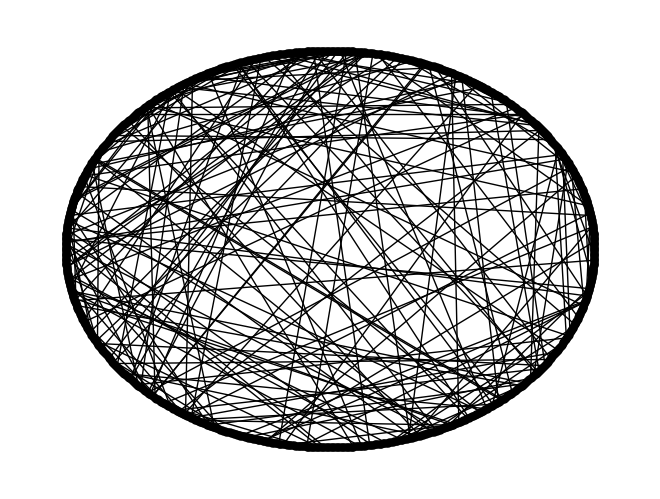

In [9]:
G2 = genSmallWorld(1000,2,0.2)
nx.draw_circular(G2, node_color='black', node_size=25)

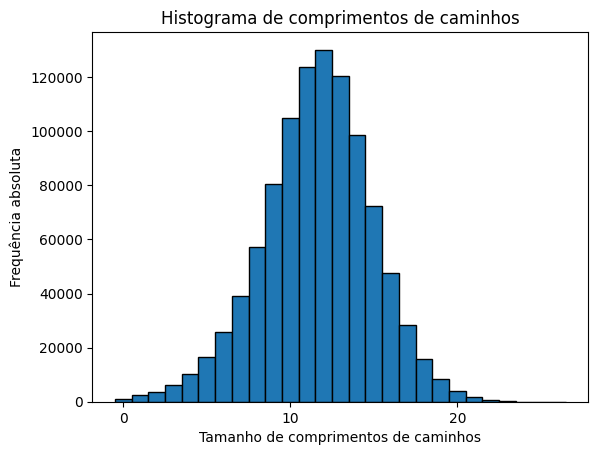

In [10]:
G2Lenghts = FindAllPathLengths(G2)
plot_hist(G2Lenghts)

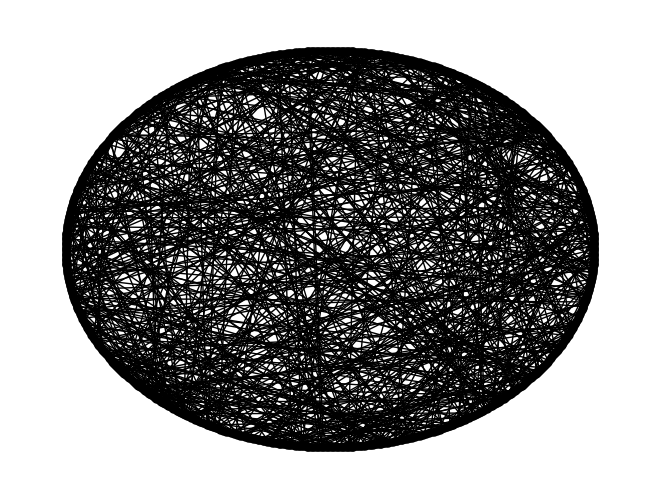

In [24]:
G3 = genSmallWorld(1000,2,0.68)
nx.draw_circular(G3, node_color='black', node_size=25)

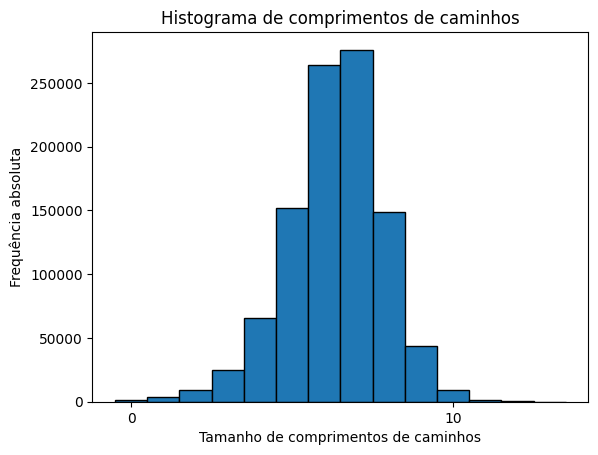

In [12]:
G3Lenghts = FindAllPathLengths(G3)
plot_hist(G3Lenghts)

Aumentando o p 10x como no exemplo, de 0.02 para 0.2, a quantidade de atalhos na rede aumenta muito, isso pode ser constatado olhando o gráfico circular dos 2 casos. Com o aumento dos atalhos, a distância entre os nós acaba mudando significativamente porque essas novas arestas aumentam a possibilidades de caminhos de um nó a outro, sendo que esses caminhos são menores como inferimos pelo seu próprio nome, *atalhos*.

Os atalhos diminuem as possibilidades de comprimento de caminhos, já que na segunda situção o maior comprimento foi de aproximadamente 25 enquanto na primeira foi acima de 120. 

Então, aparentemente, quanto mais aumentarmos o p, mais atalhos teremos e obteremos menores quantidades de caminhos, vamos "diminuindo" nosso histograma. Para obter os 6 graus de separação, precisa-se que o 6 se torne nossa média no histograma. Pelos testes que feitos com 𝑁 = 1.000 e 𝑍 = 2, isso deve ocorrer com *p entre 0,65 e 0,7*.

## B.3

In [13]:
def findAveragePathLength(graph):
  listOfLengths = FindAllPathLengths(graph)
  lengths = []

  for i in listOfLengths:
    lengths += list(i.values())

  averagePathLength = np.mean(lengths)

  return averagePathLength

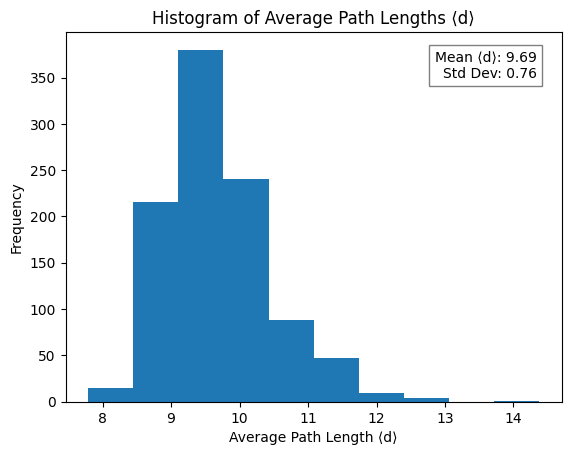

Estimativa do número de arestas longas: 10


In [14]:
N = 100
Z = 2
p = 0.1
num_iterations = 1000
average_path_lengths = []

# Calcular a média ⟨d⟩ várias vezes
for _ in range(num_iterations):
    G4 = genSmallWorld(N, Z, p)
    avg_path_length = findAveragePathLength(G4)
    average_path_lengths.append(avg_path_length)

mean_d = np.mean(average_path_lengths)
std_d = np.std(average_path_lengths)

plt.hist(average_path_lengths, bins=10)
plt.xlabel('Average Path Length ⟨d⟩')
plt.ylabel('Frequency')
plt.title('Histogram of Average Path Lengths ⟨d⟩')

plt.text(0.95, 0.95, f'Mean ⟨d⟩: {mean_d:.2f}\nStd Dev: {std_d:.2f}', 
         ha='right', va='top', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()


shortcuts = int(p * (N * Z / 2))
print(f"Estimativa do número de arestas longas: {shortcuts}")


Espera-se 10 arestas longas no grafo. Essas arestas longas longas vão diminuir a distância entra alguns nós e como elas são aleatória espera-se que houvesse essa flutuação nos caminhos.

# C

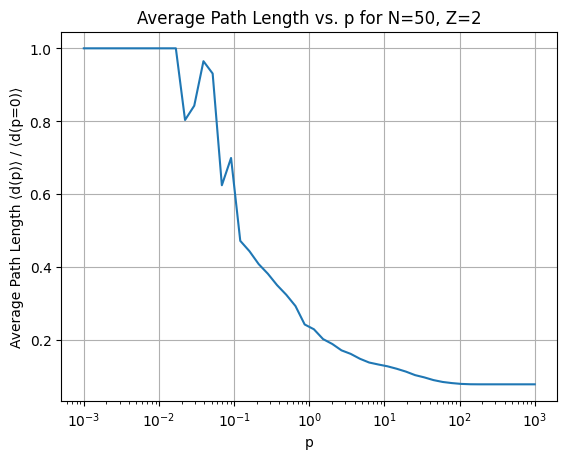

In [15]:
N = 50
Z = 2
p_values = np.logspace(-3, 3, num=50) 

avg_path_lengths = []

G5 = genSmallWorld(N, Z, 0)
d_p0 = findAveragePathLength(G5)

for p in p_values:
    G = genSmallWorld(N, Z, p)
    avg_path_length = findAveragePathLength(G) / d_p0
    avg_path_lengths.append(avg_path_length)

plt.semilogx(p_values, avg_path_lengths)
plt.xlabel('p')
plt.ylabel('Average Path Length ⟨d(p)⟩ / ⟨d(p=0)⟩')
plt.title(f'Average Path Length vs. p for N={N}, Z={Z}')
plt.grid(True)
plt.show()

Com **p** muito pequeno nossa rede acaba não tendo muitos atalhos o que faz com que d(p) seja igual a d(0) resultando no valor 1. Quanto mais aumentamos **p**, mais atalhos vão surgindo na nossa rede e os caminhos entre os nós vão diminuindo o que por consequência diminui a média dos caminhos entre os nós e diminui o valor da função que estamos analisando: d(p) / d(0)

# D

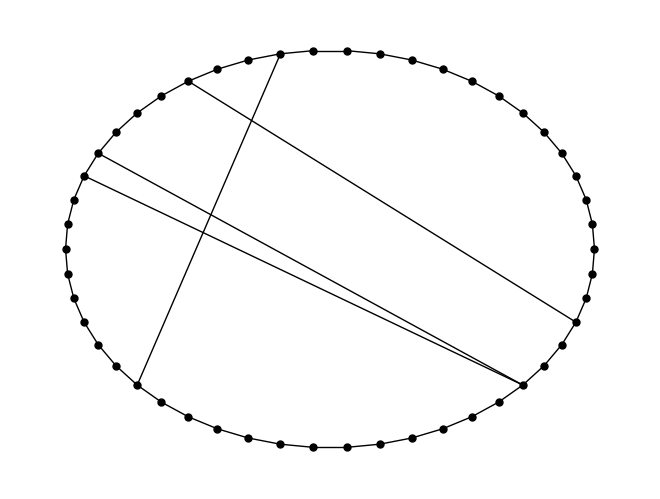

In [31]:
G6 = genSmallWorld(50,2,0.1)
nx.draw_circular(G6, node_color='black', node_size=25)

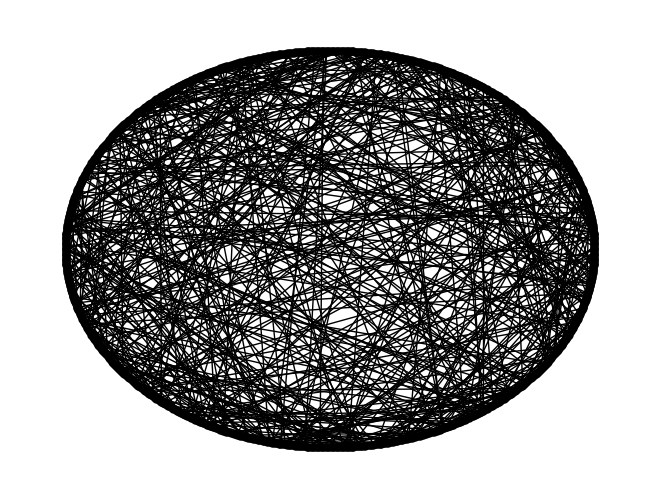

In [17]:
G7 = nx.watts_strogatz_graph(1000,10,0.1)
nx.draw_circular(G7, node_color='black', node_size=25)

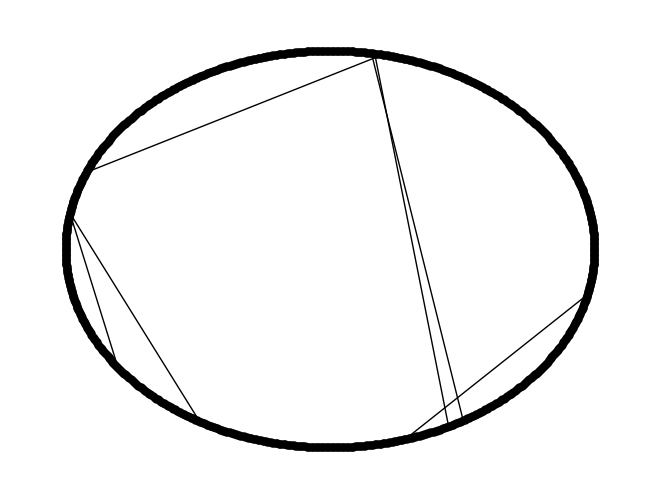

In [38]:
G8 = nx.watts_strogatz_graph(1000,10,0.001)
nx.draw_circular(G8, node_color='black', node_size=25)

O segundo com 𝑍 = 10, 𝑁 = 1.000 e p = 0.001 e o mais semelhante, já que a quantidade de atalho é parecida com o que foi gerado usando o algoritimo implementado.

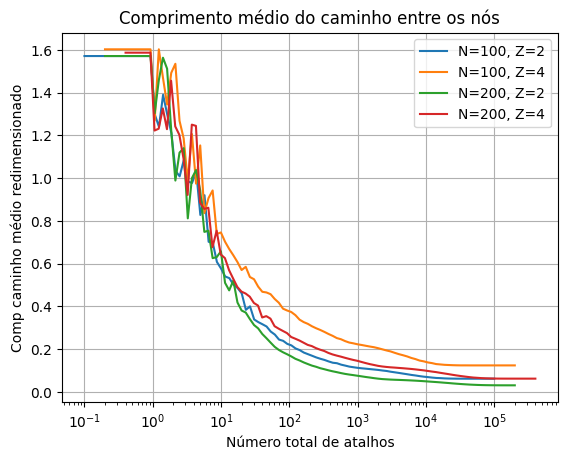

In [30]:
G9 = genSmallWorld(50,2,0)
meanPath_0 = findAveragePathLength(G9)
N = [100,200]
Z = [2,4]

avLenRed = []
shortcutTotal = []
data = []

# Usamos uma escala logaritma para o decaimento de p, já que L(p) decai rapidamente.
pValues = np.logspace(np.log10(0.001), np.log10(1000), 100)


for n in N:
    for z in Z:
        for p in pValues:
            graph = genSmallWorld(n, z, p)
            d = findAveragePathLength(graph)
            avLenRed = (np.pi * z * d) / n
            shortcutTotal = (p * n * z) / 2
            data.append((shortcutTotal, avLenRed))


dataN100Z2 = data[:100]
dataN100Z4 = data[100:200]
dataN200Z2 = data[200:300]
dataN200Z4 = data[300:400]




dataN100Z2 = sorted(dataN100Z2, key=lambda x: x[0])
dataN100Z4 = sorted(dataN100Z4, key=lambda x: x[0])
dataN200Z2 = sorted(dataN200Z2, key=lambda x: x[0])
dataN200Z4 = sorted(dataN200Z4, key=lambda x: x[0])

# Extraindo os valores de atalhos e comprimento médio redimensionado
shortcutTotalN100Z2, avLenRedN100Z2 = zip(*dataN100Z2)
shortcutTotalN100Z4, avLenRedN100Z4 = zip(*dataN100Z4)
shortcutTotalN200Z2, avLenRedN200Z2 = zip(*dataN200Z2)
shortcutTotalN200Z4, avLenRedN200Z4 = zip(*dataN200Z4)

# Plotando os gráficos
plt.plot(shortcutTotalN100Z2, avLenRedN100Z2, label='N=100, Z=2')
plt.plot(shortcutTotalN100Z4, avLenRedN100Z4, label='N=100, Z=4')
plt.plot(shortcutTotalN200Z2, avLenRedN200Z2, label='N=200, Z=2')
plt.plot(shortcutTotalN200Z4, avLenRedN200Z4, label='N=200, Z=4')

plt.xscale('log')
plt.xlabel('Número total de atalhos')
plt.ylabel('Comp caminho médio redimensionado')
plt.title('Comprimento médio do caminho entre os nós')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

# E

In [20]:
df = pd.read_csv('aves-songbird-social.edges', sep=' ', header=None)
df.head()

,0,1,2
0,1,2,0.073593
1,1,3,0.018304
2,1,4,0.289779
3,1,6,0.001441
4,1,8,0.002503


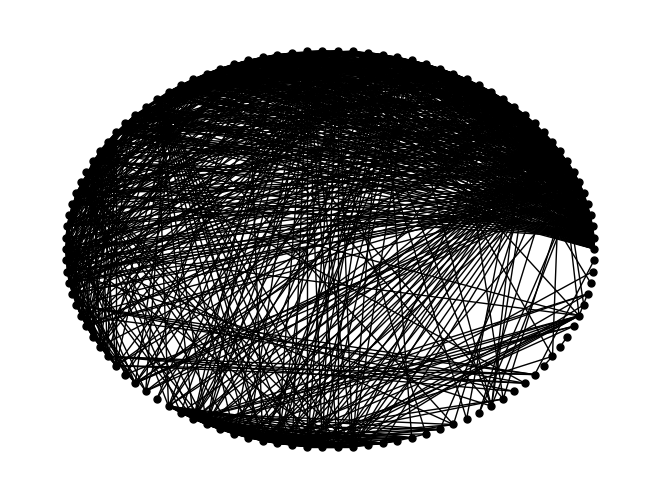

In [21]:
rede_real = nx.from_pandas_edgelist(df, source=0, target=1, edge_attr=2)
nx.draw_circular(rede_real, node_color='black', node_size=25)

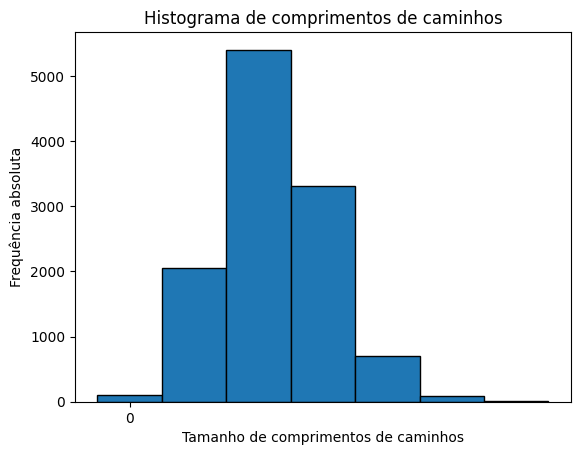

In [22]:
realGraphLenghts = FindAllPathLengths(rede_real)
plot_hist(realGraphLenghts)

In [23]:
real_Graph_Media = findAveragePathLength(realGraphLenghts)
print('O comprimento médio dos caminhos é: ', real_Graph_Media)

O comprimento médio dos caminhos é:  2.23277339732602
